# REPORTE PRÁCTICA 10: Clasificación de datos con sklearn

# Análisis de Datos Multivariado 

#  Caso de Estudio: 
## Condiciones en los Centros de Reinserción Social CERESO y Topo Chico   


####    Evely Gutiérrez Noda     #1935050


# Introducción

En el siguiente reporte se analiza el caso de estudio que permitirá evaluar las condiciones de reinserción social dentro del CERESO "Apodaca" y dentro del Centro Preventivo de Reinserción Topo Chico. Los datos que se usan para este estudio provienen de encuestas realizadas a mujeres y hombres, que se encuentran privados de libertad dentro del Centro de Reinserción. 

El siguiente reporte se trabaja utilizando algunos métodos de clasificación a por lo menor una división de interés en los datos de los internos. Se realiza una proyección o selección bidimensional de atributos para poder visualizar el resultado.

Primeramente, se instalan los paquetes necesarios realizar este trabajo, luego se analizan los factores que resultaron significativos en su correlación en prácticas anteriores, como los ingresos mensuales que tenían los internos, para los que se utiliza la nomenclatura siguiente:

1. Menos de 3,000
2. De 3,001 a 6,000
3. De 6,001 a 9,000
4. Más de 9,000 

Se usa para el clasificador, los ingresos por encima de 9000 pesos, con la etiqueta 4. 

Se tiene en cuenta para el clasificador la edad de los internos, el cual fue otro de los factores de mayor significancia en prácticas anteriores. Se tiene en cuenta las edades mayores a 16 años ya que en algunas respuestas a esta pregunta los internos respondían edades menores a 16 y no es verdadero.


Finalmente, los valores que se colocan las etiquetas con las que se va a realizar la clasificación son:

- Internos con edad mayor a 16
- Ingresos mensuales mayores a 9000 (con la etiqueta 4)
- Los que no cumplen con las condiciones anteriores

2    808
1    136
0     11
Name: etiquetas, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


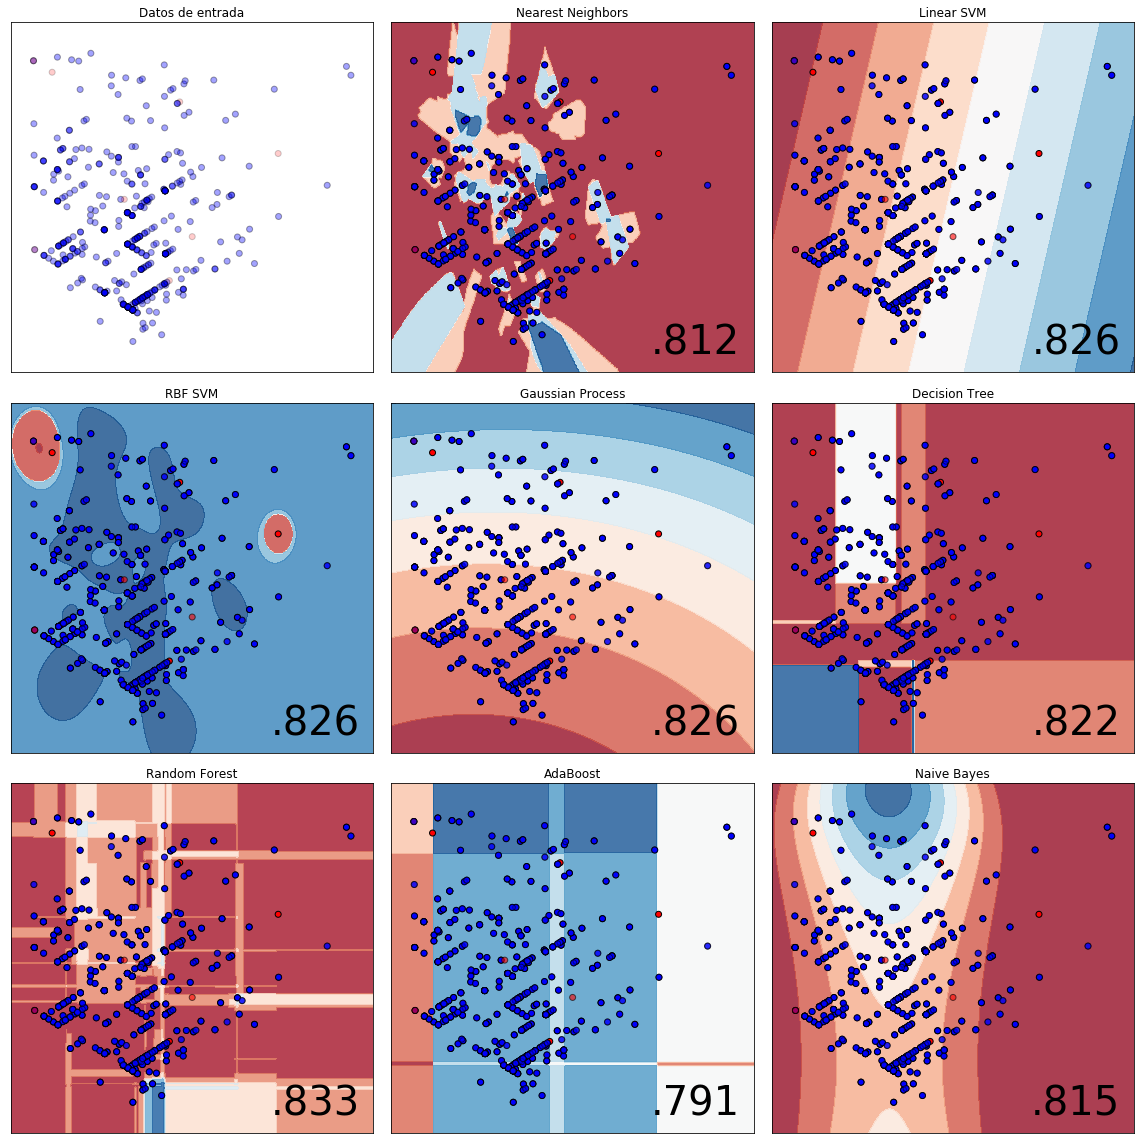

In [117]:
import ssl
import pandas as pd
from math import ceil, sqrt
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from numpy import isnan, nan, arange, meshgrid, c_
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

                                                                                                                  
if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("practica6.csv")
d = pd.concat([o.loc[o.age >= 16], o.loc[~isnan(o.age)]]) 


cat = pd.Categorical(d.crimen)
d.crimen = cat.codes
cat2 = pd.Categorical(d.educacion)
d.educacion = cat2.codes


pri = d.incomePrev >= 4
seg = d.age >= 16
ter = ~pri & ~seg


d['etiquetas'] = [1 if  pri[i].all() else (2 if seg[i].all() else (0 if ter[i].all() else "NA")) for i in pri.keys()] # etiquetas
print(d.etiquetas.value_counts())
y = d.etiquetas

xVars = ['sentenceYears', 'crimen', 'educacion']

x = d.loc[:, xVars].values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components = 2) 
X = pca.fit_transform(x)

h = 0.02 #tamaño de paso en la malla

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process", \
         "Decision Tree", "Random Forest", "AdaBoost", "Naive Bayes"]
classifiers = [KNeighborsClassifier(3), SVC(kernel="linear", C=0.025), \
    SVC(gamma=2, C=1), GaussianProcessClassifier(1.0 * RBF(1.0)), \
    DecisionTreeClassifier(max_depth=5), RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1), \
    AdaBoostClassifier(), GaussianNB()]
k = int(ceil(sqrt(len(classifiers) + 1)))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42) # división
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = meshgrid(arange(x_min, x_max, h), arange(y_min, y_max, 0.02))
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.rcParams["figure.figsize"] = [16, 16]
figure = plt.figure()
ax = plt.subplot(k, k, 1)
ax.set_title("Datos de entrada")
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, alpha=0.2, edgecolors='k') # entrenamiento
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.2, edgecolors='k') # validación
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
i = 2
for name, clf in zip(names, classifiers):
    ax = plt.subplot(k, k, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(c_[xx.ravel(), yy.ravel()])[:, 1]
    else:
        Z = clf.predict_proba(c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.3f' % score).lstrip('0'), size=40, horizontalalignment='right')
    i += 1
plt.tight_layout()
plt.show()

La parte inferior derecha de las imágenes muestra la precisión de la clasificación en el conjunto de prueba. Para poder conocer cuántos datos fueron clasificados correctamente y cuáles eran los errores, se utiliza la [matrices de confución](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py), además se podrá comprobar si fueron buenos los modelos utilizados.

In [118]:
import ssl
import pandas as pd
from math import ceil, sqrt
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from numpy import isnan, nan
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("practica6.csv")
d = pd.concat([o.loc[o.age >= 16], o.loc[~isnan(o.age)]]) 

cat = pd.Categorical(d.crimen)
d.crimen = cat.codes
cat2 = pd.Categorical(d.educacion)
d.educacion = cat2.codes

pri = d.incomePrev >= 4
seg = d.age >= 16
ter = ~pri & ~seg


d['etiquetas'] = [1 if  pri[i].all() else (2 if seg[i].all() else (0 if ter[i].all() else "NA")) for i in pri.keys()] # etiquetas
print(d.etiquetas.value_counts())
y = d.etiquetas

xVars = ['sentenceYears', 'crimen', 'educacion']

x = d.loc[:, xVars].values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components = 2) 
X = pca.fit_transform(x)

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process", \
         "Decision Tree", "Random Forest", "AdaBoost", "Naive Bayes"]
classifiers = [KNeighborsClassifier(3), SVC(kernel="linear", C=0.025), \
    SVC(gamma=2, C=1), GaussianProcessClassifier(1.0 * RBF(1.0)), \
    DecisionTreeClassifier(max_depth=5), RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1), \
    AdaBoostClassifier(), GaussianNB()]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42) # la misma división
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    print(name, clf.score(X_test, y_test))
    expected, predicted = y_test, clf.predict(X_test)
    print(metrics.classification_report(expected, predicted))
    print(metrics.confusion_matrix(expected, predicted))
    print('-' * 60)

2    808
1    136
0     11
Name: etiquetas, dtype: int64
Nearest Neighbors 0.8083623693379791
              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.41      0.28      0.33        46
           2       0.86      0.92      0.89       237

   micro avg       0.81      0.81      0.81       287
   macro avg       0.59      0.48      0.52       287
weighted avg       0.78      0.81      0.79       287

[[  1   1   2]
 [  0  13  33]
 [  1  18 218]]
------------------------------------------------------------
Linear SVM 0.8257839721254355
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        46
           2       0.83      1.00      0.90       237

   micro avg       0.83      0.83      0.83       287
   macro avg       0.28      0.33      0.30       287
weighted avg       0.68      0.83      0.75       287

[[  0  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Gaussian Process 0.8257839721254355
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        46
           2       0.83      1.00      0.90       237

   micro avg       0.83      0.83      0.83       287
   macro avg       0.28      0.33      0.30       287
weighted avg       0.68      0.83      0.75       287

[[  0   0   4]
 [  0   0  46]
 [  0   0 237]]
------------------------------------------------------------
Decision Tree 0.8222996515679443
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.33      0.02      0.04        46
           2       0.83      0.99      0.90       237

   micro avg       0.82      0.82      0.82       287
   macro avg       0.39      0.34      0.31       287
weighted avg       0.74      0.82      0.75       287

[[  0   0   4]
 [  0   1  45]
 [  0   2 235]]
----------------

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


 0.8257839721254355
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        46
           2       0.83      1.00      0.90       237

   micro avg       0.83      0.83      0.83       287
   macro avg       0.28      0.33      0.30       287
weighted avg       0.68      0.83      0.75       287

[[  0   0   4]
 [  0   0  46]
 [  0   0 237]]
------------------------------------------------------------
AdaBoost 0.7909407665505227
              precision    recall  f1-score   support

           0       0.14      0.25      0.18         4
           1       0.11      0.02      0.04        46
           2       0.83      0.95      0.89       237

   micro avg       0.79      0.79      0.79       287
   macro avg       0.36      0.41      0.37       287
weighted avg       0.71      0.79      0.74       287

[[  1   0   3]
 [  2   1  43]
 [  4   8 225]]
-------------------------------------

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Los elementos diagonales representan el número de puntos para los cuales la etiqueta predicha es igual a la etiqueta verdadera, mientras que los elementos fuera de la diagonal son aquellos que están clasificados incorrectamente por el clasificador. Cuanto más altos sean los valores diagonales de la matriz de confusión, mejor, lo que indica muchas predicciones correctas.

En la diagonal se encuentran los valores de mayor tamaño, y en varias clasificaciones se llega a tener 0 errores, pero no la perfección de la matriz, por lo cual se intenta probar con una sola etiqueta, la de ingresos mensuales y se aumenta a 0.4 el porciento de prueba.


0    819
1    136
Name: etiquetas, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


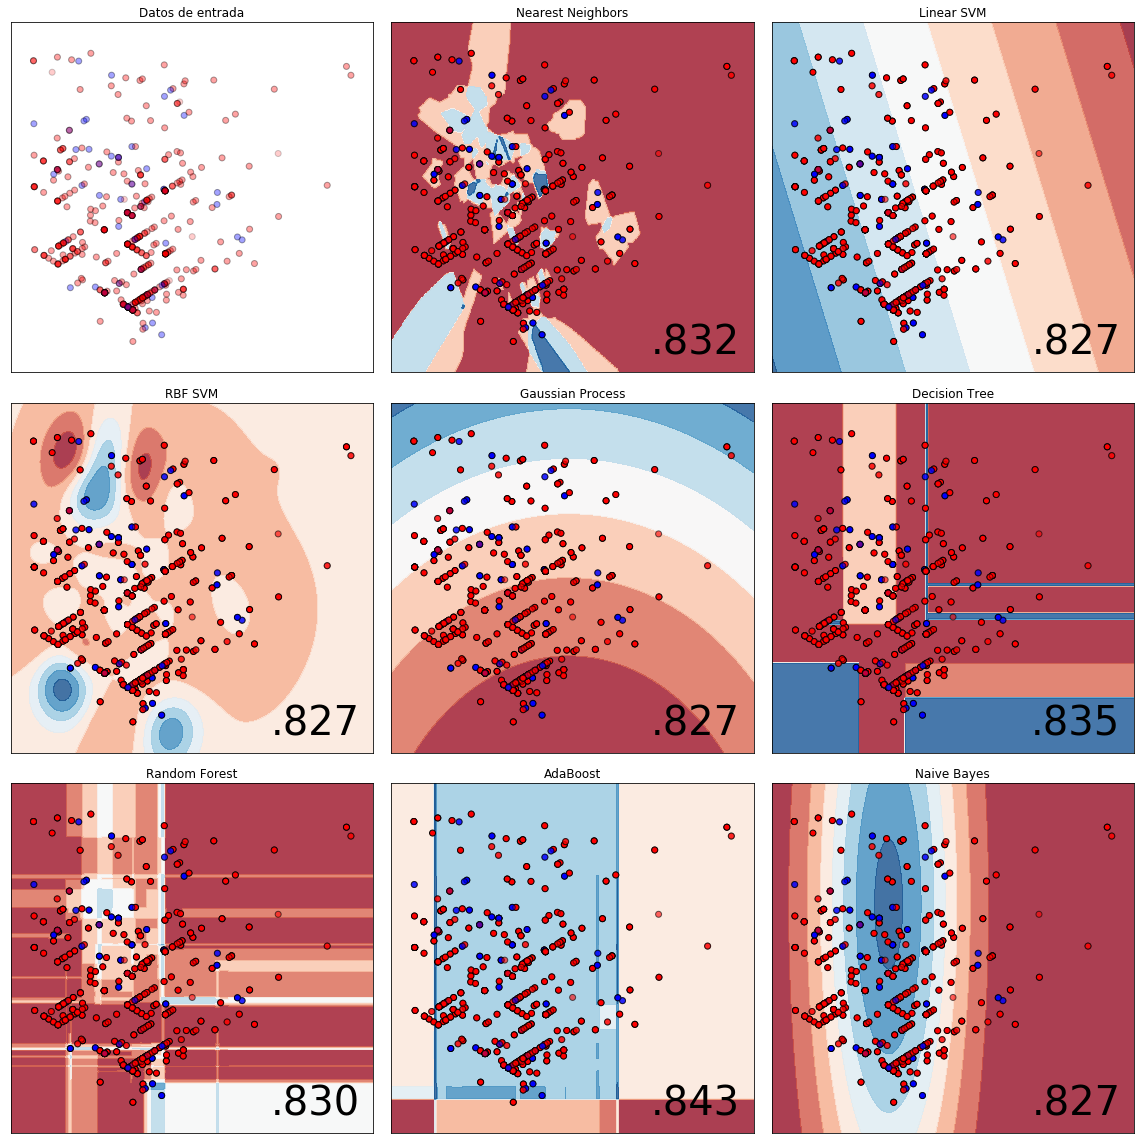

In [119]:
import ssl
import pandas as pd
from math import ceil, sqrt
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from numpy import isnan, nan, arange, meshgrid, c_
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

                                                                                                                  
if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("practica6.csv")
d = pd.concat([o.loc[o.age >= 16], o.loc[~isnan(o.age)]]) 


cat = pd.Categorical(d.crimen)
d.crimen = cat.codes
cat2 = pd.Categorical(d.educacion)
d.educacion = cat2.codes

pri = d.incomePrev >= 4

d['etiquetas'] = [1 if  pri[i].all() else 0 for i in pri.keys()]
print(d.etiquetas.value_counts())
y = d.etiquetas

xVars = ['sentenceYears', 'crimen', 'educacion']

x = d.loc[:, xVars].values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components = 2)
X = pca.fit_transform(x)

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process", \
         "Decision Tree", "Random Forest", "AdaBoost", "Naive Bayes"]
classifiers = [KNeighborsClassifier(3), SVC(kernel="linear", C=0.025), \
    SVC(gamma=2, C=1), GaussianProcessClassifier(1.0 * RBF(1.0)), \
    DecisionTreeClassifier(max_depth=5), RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1), \
    AdaBoostClassifier(), GaussianNB()]
k = int(ceil(sqrt(len(classifiers) + 1)))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42) 
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = meshgrid(arange(x_min, x_max, h), arange(y_min, y_max, 0.02))
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.rcParams["figure.figsize"] = [16, 16]
figure = plt.figure()
ax = plt.subplot(k, k, 1)
ax.set_title("Datos de entrada")
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, alpha=0.2, edgecolors='k') 
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.2, edgecolors='k') 
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
i = 2
for name, clf in zip(names, classifiers):
    ax = plt.subplot(k, k, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.3f' % score).lstrip('0'), size=40, horizontalalignment='right')
    i += 1
plt.tight_layout()
plt.show()

Los valores de las esquinas inferiores aumentaron un poco, veamos las matrices de confusión para ver qué tan buena es la clasificación anterior.

In [113]:
import ssl
import pandas as pd
from math import ceil, sqrt
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from numpy import isnan, nan
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("practica6.csv")
d = pd.concat([o.loc[o.age >= 16], o.loc[~isnan(o.age)]]) 
d = d.drop(['Unnamed: 0', 'Unnamed: 0.1', 'hasChildren'], 1)


cat = pd.Categorical(d.crimen)
d.crimen = cat.codes
cat2 = pd.Categorical(d.educacion)
d.educacion = cat2.codes
cat3 = pd.Categorical(d.gender)
d.gender = cat3.codes

pri = d.incomePrev >= 4

d['etiquetas'] = [1 if  pri[i].all() else 0 for i in pri.keys()] 
print(d.etiquetas.value_counts())
y = d.etiquetas

xVars = ['sentenceYears', 'crimen', 'educacion']

x = d.loc[:, xVars].values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components = 2)
X = pca.fit_transform(x)

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process", \
         "Decision Tree", "Random Forest", "AdaBoost", "Naive Bayes"]
classifiers = [KNeighborsClassifier(3), SVC(kernel="linear", C=0.025), \
    SVC(gamma=2, C=1), GaussianProcessClassifier(1.0 * RBF(1.0)), \
    DecisionTreeClassifier(max_depth=5), RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1), \
    AdaBoostClassifier(), GaussianNB()]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    print(name, clf.score(X_test, y_test))
    expected, predicted = y_test, clf.predict(X_test)
    print(metrics.classification_report(expected, predicted))
    print(metrics.confusion_matrix(expected, predicted))
    print('-' * 60)

0    819
1    136
Name: etiquetas, dtype: int64
Nearest Neighbors 0.818815331010453
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       241
           1       0.41      0.28      0.33        46

   micro avg       0.82      0.82      0.82       287
   macro avg       0.64      0.60      0.61       287
weighted avg       0.80      0.82      0.81       287

[[222  19]
 [ 33  13]]
------------------------------------------------------------
Linear SVM 0.8397212543554007
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       241
           1       0.00      0.00      0.00        46

   micro avg       0.84      0.84      0.84       287
   macro avg       0.42      0.50      0.46       287
weighted avg       0.71      0.84      0.77       287

[[241   0]
 [ 46   0]]
------------------------------------------------------------
RBF SVM 0.8397212543554007
              precision    recall  f1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Gaussian Process 0.8397212543554007
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       241
           1       0.00      0.00      0.00        46

   micro avg       0.84      0.84      0.84       287
   macro avg       0.42      0.50      0.46       287
weighted avg       0.71      0.84      0.77       287

[[241   0]
 [ 46   0]]
------------------------------------------------------------
Decision Tree 0.8362369337979094
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       241
           1       0.33      0.02      0.04        46

   micro avg       0.84      0.84      0.84       287
   macro avg       0.59      0.51      0.48       287
weighted avg       0.76      0.84      0.77       287

[[239   2]
 [ 45   1]]
------------------------------------------------------------
Random Forest 0.8362369337979094
              precision    recall  f1-score   support

           0       0.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Estas matrices de confusión mejoran un poco, con una sola etiqueta aparecen valores más altos en la diagonal y menor valor de errores. La de mejor resultado es la Nearest Neighbors con 0.818815331010453, con 222 valores correctos contra 19 incorrectos, y 13 correctos contra 33 incorrectos.
Se intenta agregar más atributos al modelo para realizar un ajuste de parámetros que pueda ayudar a mejorar la clasificación, se agregan datos nuevos de los internos: el crimen que cometieron, el nivel de educación, los años de sentencia y el género. Como etiqueta sigue el mismo atributo, los ingresos mensuales por encima de 9000 pesos.


In [136]:
if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("practica6.csv")
d = pd.concat([o.loc[o.age >= 16], o.loc[~isnan(o.age)]]) 

etiqueta = d.incomePrev >= 4

cat = pd.Categorical(d.crimen)
d.crimen = cat.codes
cat2 = pd.Categorical(d.educacion)
d.educacion = cat2.codes
cat3 = pd.Categorical(d.gender)
d.gender = cat3.codes

xv = ['age', 'crimen', 'educacion', 'sentenceYears', 'gender']
        

d = d.loc[:, xv]

d['etiqueta'] = etiqueta
y = d.etiqueta
print(y.value_counts())
d = d.drop(['etiqueta'], 1)  
X = StandardScaler().fit_transform(d.values) 
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process", \
         "Decision Tree", "Random Forest", "AdaBoost", "Naive Bayes"]
classifiers = [KNeighborsClassifier(3), SVC(kernel="linear", C=0.025), \
    SVC(gamma=2, C=1), GaussianProcessClassifier(1.0 * RBF(1.0)), \
    DecisionTreeClassifier(max_depth=5), RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1), \
    AdaBoostClassifier(), GaussianNB()]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    y_m = clf.predict(X_test)
    print(name, metrics.classification_report(y_test, y_m))
    print(metrics.confusion_matrix(y_test, y_m))
    print('-' * 60)

False    819
True     136
Name: etiqueta, dtype: int64
Nearest Neighbors               precision    recall  f1-score   support

       False       0.89      0.96      0.92       414
        True       0.47      0.22      0.30        64

   micro avg       0.86      0.86      0.86       478
   macro avg       0.68      0.59      0.61       478
weighted avg       0.83      0.86      0.84       478

[[398  16]
 [ 50  14]]
------------------------------------------------------------
Linear SVM               precision    recall  f1-score   support

       False       0.87      1.00      0.93       414
        True       0.00      0.00      0.00        64

   micro avg       0.87      0.87      0.87       478
   macro avg       0.43      0.50      0.46       478
weighted avg       0.75      0.87      0.80       478

[[414   0]
 [ 64   0]]
------------------------------------------------------------
RBF SVM               precision    recall  f1-score   support

       False       0.89      0.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Gaussian Process               precision    recall  f1-score   support

       False       0.87      1.00      0.93       414
        True       0.00      0.00      0.00        64

   micro avg       0.87      0.87      0.87       478
   macro avg       0.43      0.50      0.46       478
weighted avg       0.75      0.87      0.80       478

[[414   0]
 [ 64   0]]
------------------------------------------------------------
Decision Tree               precision    recall  f1-score   support

       False       0.89      0.98      0.93       414
        True       0.57      0.19      0.28        64

   micro avg       0.87      0.87      0.87       478
   macro avg       0.73      0.58      0.61       478
weighted avg       0.84      0.87      0.84       478

[[405   9]
 [ 52  12]]
------------------------------------------------------------
Random Forest               precision    recall  f1-score   support

       False       0.88      0.99      0.93       414
        True       0.54 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


En las matrices anteriores algunos clasificadores llegaron a dar valor 0 en los erróneos, pero este ajuste de parámetros no logro perfección en los clasificadores. Esto indica que a pesar de que en prácticas anteriores el ingreso mensual de los internos fue un aspecto significativo en el tipo de delito a cometer, en este caso no resulta un elemento significativo para caracterizar a los internos.